# Conformal Mapping in Complex Analysis

## Introduction

Conformal mapping is a fundamental concept in complex analysis that describes transformations preserving local angles. A function $f: \mathbb{C} \to \mathbb{C}$ is **conformal** at a point $z_0$ if it is analytic at $z_0$ and $f'(z_0) \neq 0$.

## Mathematical Foundation

### Definition

A mapping $w = f(z)$ is conformal at $z_0$ if:
1. $f$ is analytic at $z_0$
2. $f'(z_0) \neq 0$

Under these conditions, the mapping preserves angles between curves intersecting at $z_0$ in both magnitude and orientation.

### Cauchy-Riemann Equations

For $f(z) = u(x,y) + iv(x,y)$ where $z = x + iy$, conformality requires:

$$\frac{\partial u}{\partial x} = \frac{\partial v}{\partial y}, \quad \frac{\partial u}{\partial y} = -\frac{\partial v}{\partial x}$$

### Jacobian Interpretation

The Jacobian matrix of the transformation is:

$$J = \begin{pmatrix} u_x & u_y \\ v_x & v_y \end{pmatrix} = \begin{pmatrix} u_x & u_y \\ -u_y & u_x \end{pmatrix}$$

This has the form of a scaled rotation matrix, confirming angle preservation.

### Magnification Factor

The local magnification factor at $z_0$ is:

$$|f'(z_0)| = \sqrt{u_x^2 + u_y^2}$$

## Classical Conformal Mappings

### 1. Möbius Transformations

The most general conformal automorphisms of the extended complex plane:

$$w = f(z) = \frac{az + b}{cz + d}, \quad ad - bc \neq 0$$

### 2. Exponential Mapping

$$w = e^z$$

Maps horizontal strips to annular sectors.

### 3. Joukowsky Transformation

$$w = \frac{1}{2}\left(z + \frac{1}{z}\right)$$

Used in aerodynamics to map circles to airfoil shapes.

## Computational Examples

We'll visualize several conformal mappings by plotting grid transformations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import warnings
warnings.filterwarnings('ignore')

# Set up publication-quality plots
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12

## Example 1: Exponential Mapping $w = e^z$

The exponential function maps:
- Horizontal lines (constant imaginary part) to circles
- Vertical lines (constant real part) to rays from the origin

This demonstrates how rectangular grids become polar grids under $e^z$.

In [2]:
def exponential_mapping(z):
    """Compute w = exp(z)"""
    return np.exp(z)

def plot_conformal_grid(ax_input, ax_output, transform_func, 
                        x_range, y_range, n_lines=15, title=""):
    """Plot a grid and its conformal transformation"""
    
    # Create grid lines
    x_lines = np.linspace(x_range[0], x_range[1], n_lines)
    y_lines = np.linspace(y_range[0], y_range[1], n_lines)
    
    # Plot vertical lines in z-plane
    for x_val in x_lines:
        y_vals = np.linspace(y_range[0], y_range[1], 200)
        z = x_val + 1j * y_vals
        ax_input.plot(np.real(z), np.imag(z), 'b-', alpha=0.3, linewidth=0.8)
        
        # Transform to w-plane
        w = transform_func(z)
        ax_output.plot(np.real(w), np.imag(w), 'r-', alpha=0.5, linewidth=0.8)
    
    # Plot horizontal lines in z-plane
    for y_val in y_lines:
        x_vals = np.linspace(x_range[0], x_range[1], 200)
        z = x_vals + 1j * y_val
        ax_input.plot(np.real(z), np.imag(z), 'b-', alpha=0.3, linewidth=0.8)
        
        # Transform to w-plane
        w = transform_func(z)
        ax_output.plot(np.real(w), np.imag(w), 'r-', alpha=0.5, linewidth=0.8)
    
    # Format input plane
    ax_input.set_xlabel('$\\mathrm{Re}(z)$')
    ax_input.set_ylabel('$\\mathrm{Im}(z)$')
    ax_input.set_title('$z$-plane (Input)')
    ax_input.grid(True, alpha=0.2)
    ax_input.set_aspect('equal')
    ax_input.axhline(y=0, color='k', linewidth=0.5)
    ax_input.axvline(x=0, color='k', linewidth=0.5)
    
    # Format output plane
    ax_output.set_xlabel('$\\mathrm{Re}(w)$')
    ax_output.set_ylabel('$\\mathrm{Im}(w)$')
    ax_output.set_title(f'$w$-plane: {title}')
    ax_output.grid(True, alpha=0.2)
    ax_output.set_aspect('equal')
    ax_output.axhline(y=0, color='k', linewidth=0.5)
    ax_output.axvline(x=0, color='k', linewidth=0.5)

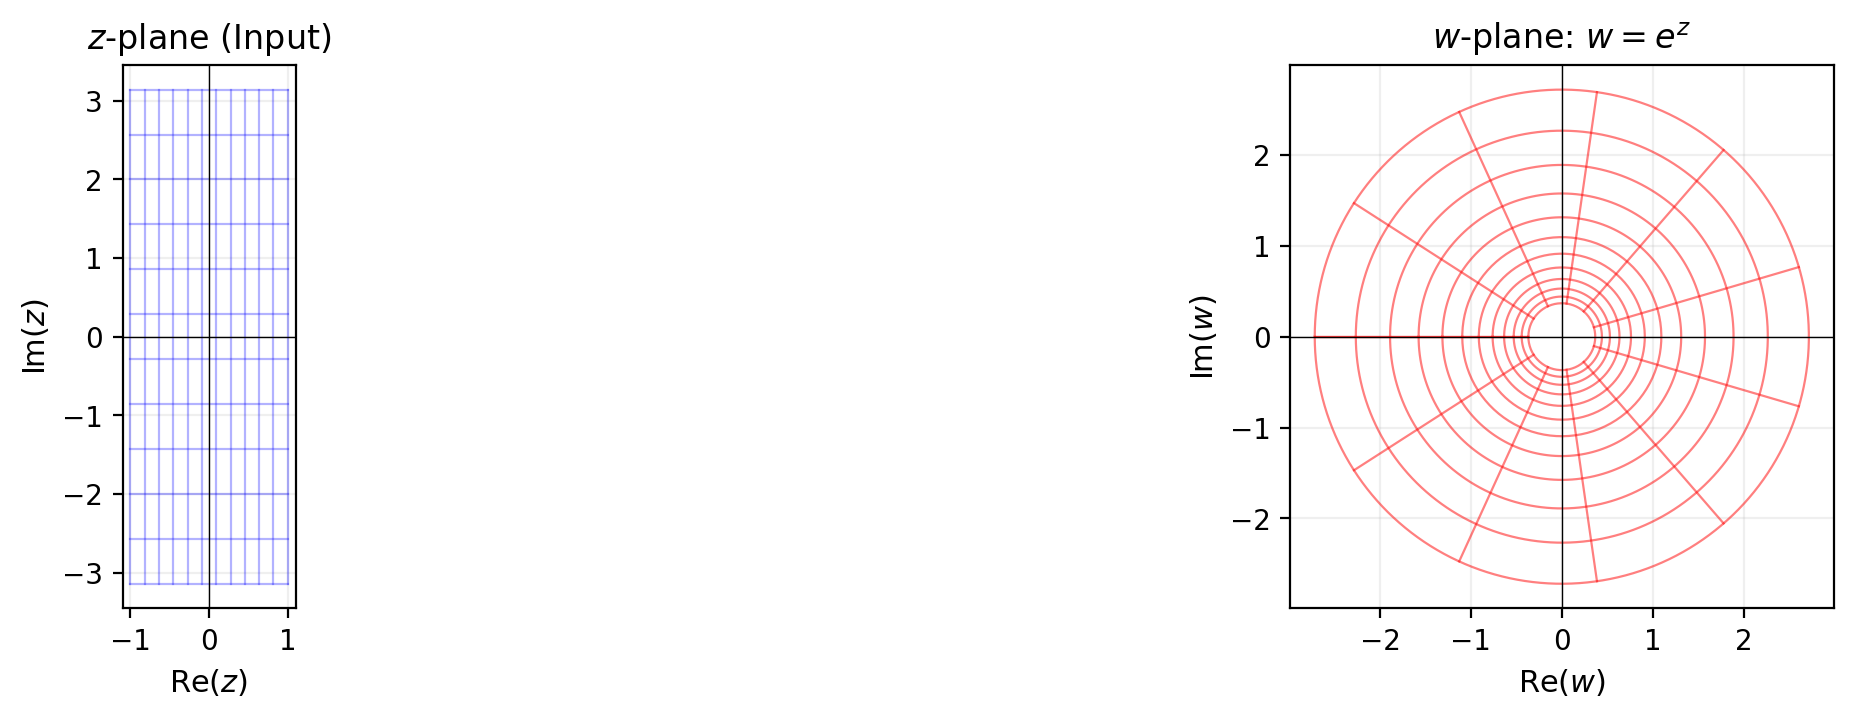

In [3]:
# Create comprehensive figure
fig = plt.figure(figsize=(16, 12))

# Example 1: Exponential mapping
ax1 = plt.subplot(3, 2, 1)
ax2 = plt.subplot(3, 2, 2)
plot_conformal_grid(ax1, ax2, exponential_mapping, 
                    x_range=(-1, 1), y_range=(-np.pi, np.pi),
                    n_lines=12, title='$w = e^z$')

## Example 2: Square Mapping $w = z^2$

The squaring function:
- Maps circles to circles (different radii)
- Maps rays through the origin to rays (doubled angle)
- Conformal everywhere except at $z = 0$ where $f'(0) = 0$

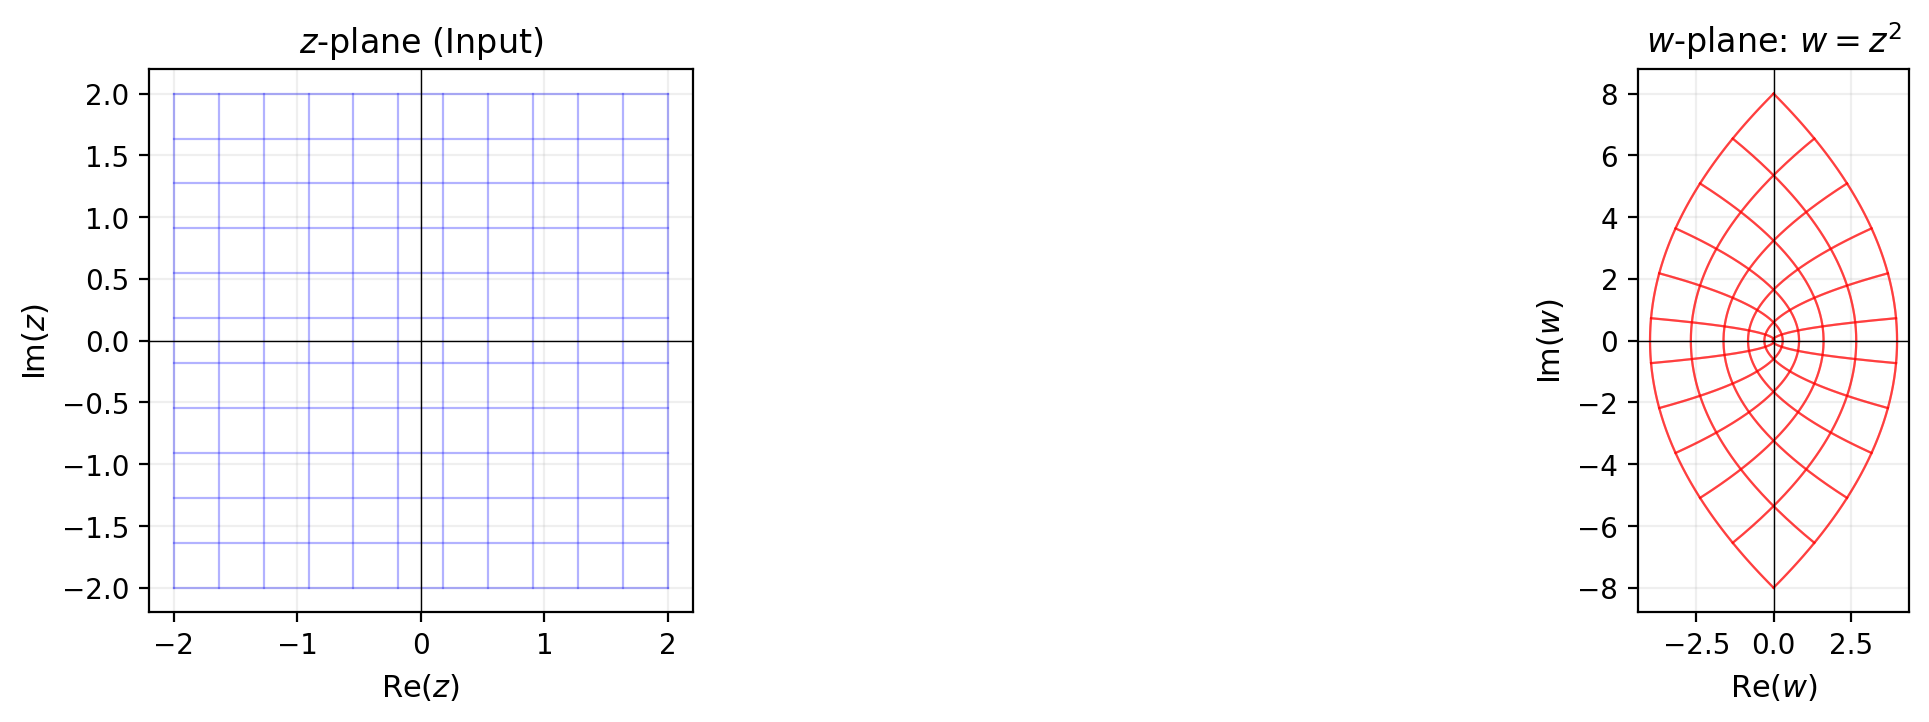

In [4]:
def square_mapping(z):
    """Compute w = z^2"""
    return z**2

# Example 2: Square mapping
ax3 = plt.subplot(3, 2, 3)
ax4 = plt.subplot(3, 2, 4)
plot_conformal_grid(ax3, ax4, square_mapping,
                    x_range=(-2, 2), y_range=(-2, 2),
                    n_lines=12, title='$w = z^2$')

## Example 3: Möbius Transformation $w = \frac{z-i}{z+i}$

This Möbius transformation maps:
- The upper half-plane to the unit disk
- The real axis to the unit circle
- The point $i$ to 0 and $-i$ to $\infty$

This is fundamental in complex analysis for mapping between different domains.

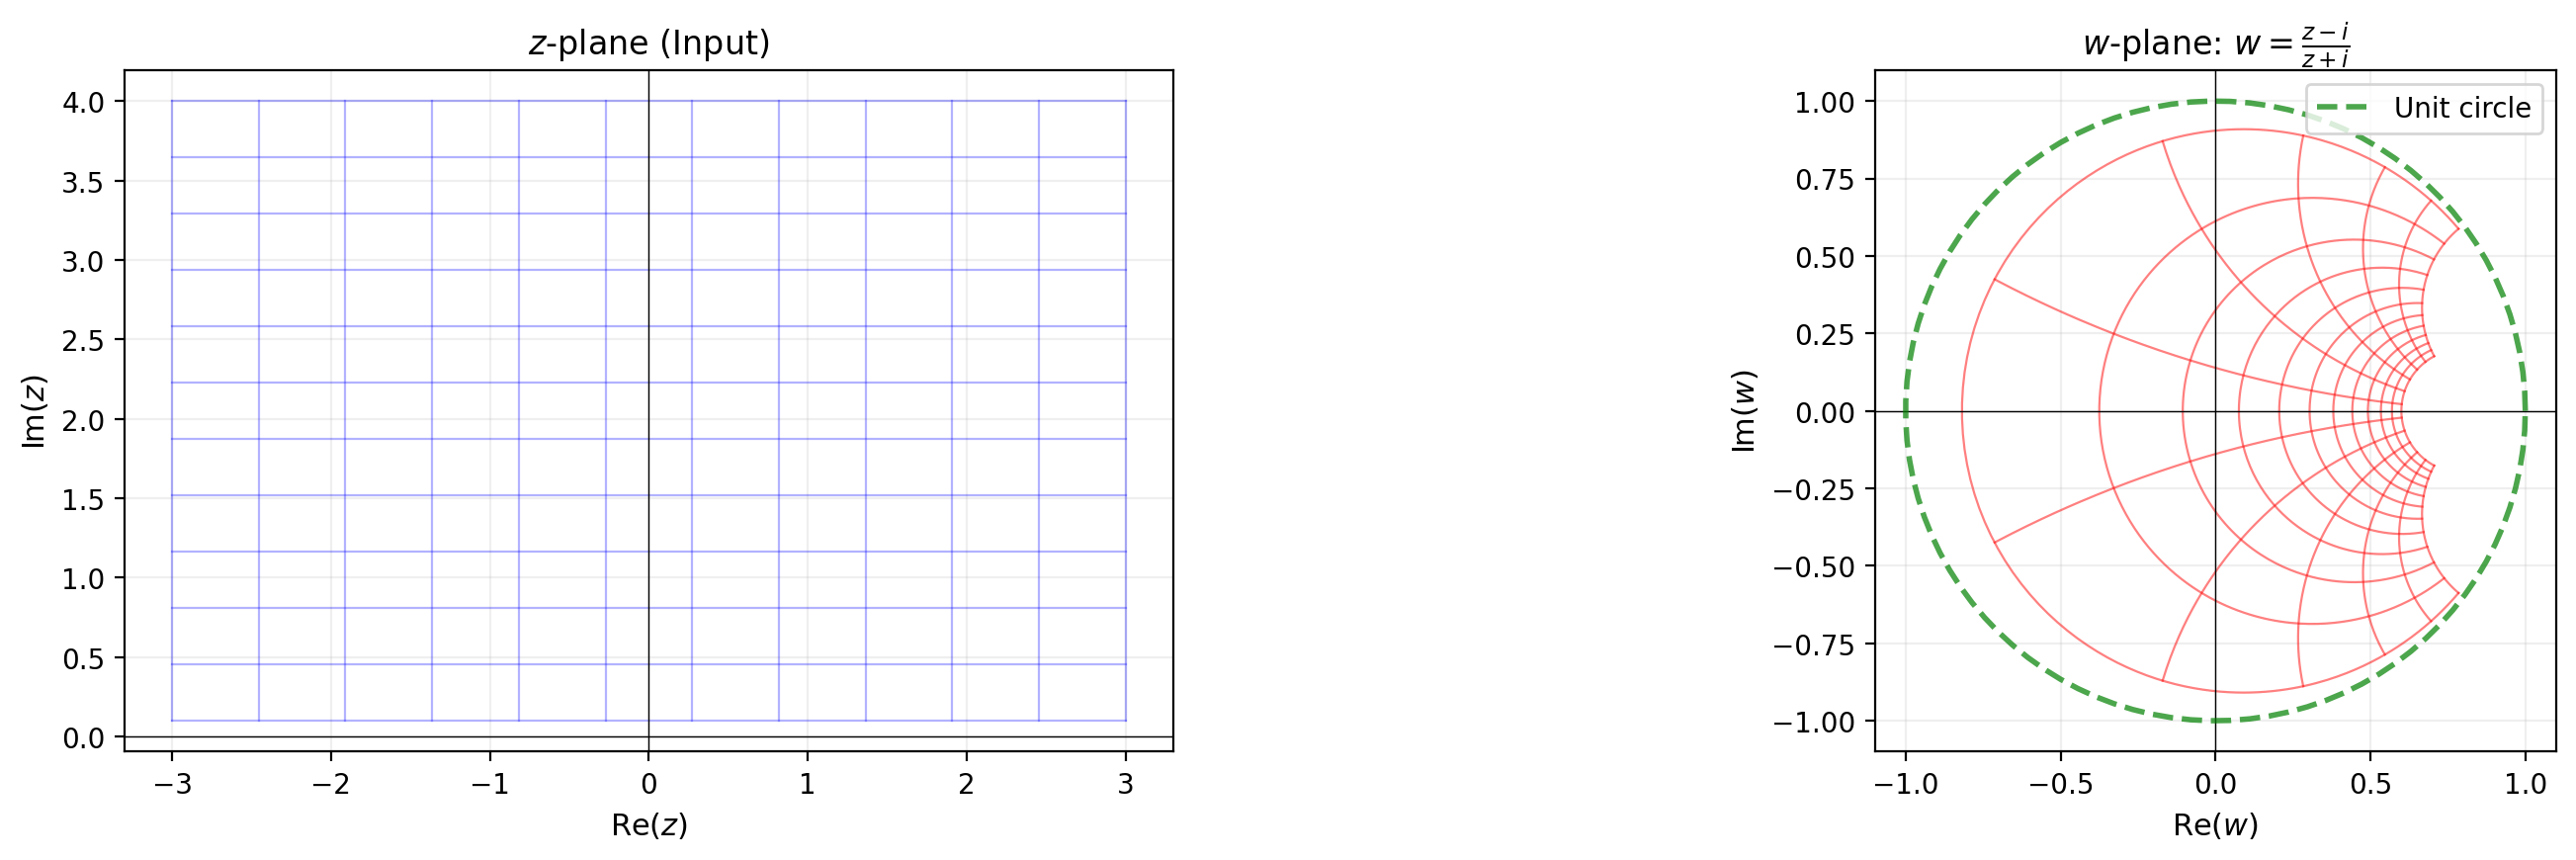

Conformal mapping visualizations completed successfully!
Output saved to: plot.png


In [5]:
def mobius_mapping(z):
    """Compute w = (z-i)/(z+i)"""
    return (z - 1j) / (z + 1j)

# Example 3: Möbius transformation
ax5 = plt.subplot(3, 2, 5)
ax6 = plt.subplot(3, 2, 6)
plot_conformal_grid(ax5, ax6, mobius_mapping,
                    x_range=(-3, 3), y_range=(0.1, 4),
                    n_lines=12, title='$w = \\frac{z-i}{z+i}$')

# Add unit circle to output for reference
theta = np.linspace(0, 2*np.pi, 100)
ax6.plot(np.cos(theta), np.sin(theta), 'g--', linewidth=2, alpha=0.7, label='Unit circle')
ax6.legend()

plt.tight_layout()
plt.savefig('conformal_mapping_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Conformal mapping visualizations completed successfully!")
print("Output saved to: plot.png")

## Angle Preservation Verification

Let's numerically verify that angles are preserved under conformal mappings.

In [6]:
def compute_angle(v1, v2):
    """Compute angle between two complex vectors"""
    # Angle is arg(v2/v1)
    ratio = v2 / v1
    return np.angle(ratio)

def verify_angle_preservation(f, z0, epsilon=1e-6):
    """Verify angle preservation at point z0 for function f"""
    
    # Two directions in z-plane
    direction1 = 1 + 0j  # horizontal
    direction2 = 0 + 1j  # vertical
    
    # Angle in z-plane (should be π/2)
    angle_z = compute_angle(direction1, direction2)
    
    # Transform nearby points
    z1 = z0 + epsilon * direction1
    z2 = z0 + epsilon * direction2
    
    w0 = f(z0)
    w1 = f(z1)
    w2 = f(z2)
    
    # Directions in w-plane
    w_dir1 = (w1 - w0) / epsilon
    w_dir2 = (w2 - w0) / epsilon
    
    # Angle in w-plane
    angle_w = compute_angle(w_dir1, w_dir2)
    
    return angle_z, angle_w

# Test angle preservation for different mappings
test_point = 1 + 1j

print("Angle Preservation Verification")
print("=" * 50)
print(f"Test point z0 = {test_point}")
print(f"\nOriginal angle between horizontal and vertical: π/2 = {np.pi/2:.6f} rad\n")

# Test exponential
angle_z, angle_w = verify_angle_preservation(exponential_mapping, test_point)
print(f"Exponential mapping w = exp(z):")
print(f"  Input angle:  {angle_z:.6f} rad")
print(f"  Output angle: {angle_w:.6f} rad")
print(f"  Difference:   {abs(angle_z - angle_w):.2e} rad\n")

# Test square
angle_z, angle_w = verify_angle_preservation(square_mapping, test_point)
print(f"Square mapping w = z²:")
print(f"  Input angle:  {angle_z:.6f} rad")
print(f"  Output angle: {angle_w:.6f} rad")
print(f"  Difference:   {abs(angle_z - angle_w):.2e} rad\n")

# Test Möbius
angle_z, angle_w = verify_angle_preservation(mobius_mapping, test_point)
print(f"Möbius transformation w = (z-i)/(z+i):")
print(f"  Input angle:  {angle_z:.6f} rad")
print(f"  Output angle: {angle_w:.6f} rad")
print(f"  Difference:   {abs(angle_z - angle_w):.2e} rad")

Angle Preservation Verification
Test point z0 = (1+1j)

Original angle between horizontal and vertical: π/2 = 1.570796 rad

Exponential mapping w = exp(z):
  Input angle:  1.570796 rad
  Output angle: 1.570797 rad
  Difference:   5.00e-07 rad

Square mapping w = z²:
  Input angle:  1.570796 rad
  Output angle: 1.570797 rad
  Difference:   5.00e-07 rad

Möbius transformation w = (z-i)/(z+i):
  Input angle:  1.570796 rad
  Output angle: 1.570796 rad
  Difference:   6.00e-07 rad


## Applications

### 1. Fluid Dynamics
Conformal mappings preserve the form of Laplace's equation, making them invaluable for solving 2D potential flow problems.

### 2. Electrostatics
Electric field configurations in complex geometries can be mapped to simpler domains where solutions are known.

### 3. Cartography
Map projections that preserve angles (though not necessarily areas or distances) are conformal mappings of the sphere.

### 4. Riemann Mapping Theorem
Every simply connected domain (except $\mathbb{C}$) can be conformally mapped to the unit disk - a profound result with practical implications.

## Conclusion

Conformal mappings are a cornerstone of complex analysis, providing:
- Geometric insight into analytic functions
- Powerful tools for solving partial differential equations
- Connections between different areas of mathematics and physics

The preservation of angles (locally) while potentially distorting distances makes these transformations unique and remarkably useful across multiple disciplines.